In [81]:
import pandas as pd
import numpy as np

In [8]:
clients = pd.read_csv('x5-uplift-valid/data/clients2.csv')
products = pd.read_csv('x5-uplift-valid/data/products.csv')
tranz = pd.read_csv('x5-uplift-valid/train_purch/train_purch.csv')

In [64]:
tranz_and_prod = tranz.merge(products, on='product_id', how='left')

In [37]:
tranz['transaction_datetime'] = pd.to_datetime(tranz['transaction_datetime'])

In [66]:
counts_tranz = tranz.groupby('client_id')['transaction_datetime'].agg(['min', 'max', 'nunique'])

In [67]:
counts_tranz['days_delta'] = counts_tranz['max'] - counts_tranz['min']
counts_tranz['days_delta'] = counts_tranz['days_delta'].dt.days

In [69]:
counts_tranz['mean_counts_of_days'] = counts_tranz['nunique'] / counts_tranz['days_delta']

In [70]:
counts_tranz['mean_counts_of_days'] = np.where(counts_tranz['mean_counts_of_days'
                                                           ] == np.inf, 0, counts_tranz['mean_counts_of_days'])

In [21]:
clients = clients.drop('client_id.1', axis=1)

In [90]:
full_df = clients.merge(counts_tranz, on='client_id', how='left')

In [93]:
full_df = full_df.merge(mean_for_num_reatires, on='client_id', how='left')

In [75]:
mean_for_num_reatires = tranz_and_prod.groupby('client_id').mean()

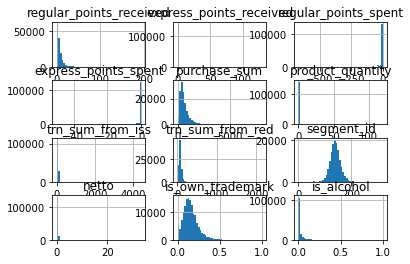

In [82]:
mean_for_num_reatires.hist(bins=50);

In [91]:
mean_for_num_reatires = mean_for_num_reatires.reset_index()

In [97]:
test_df = full_df[full_df['is_alcohol'].notna()]

In [100]:
test_df.trn_sum_from_red = test_df.trn_sum_from_red.fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
